In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simple function to analyze a single EEI network file
def analyze_single_network(file_path, method, species):
    """
    Analyze a single EEI network file
    """
    try:
        df = pd.read_csv(file_path, sep='\t')
        
        # Determine column names based on method
        if method.lower() == 'contact':
            exon1_col, exon2_col = 'exon1', 'exon2'
            protein1_col, protein2_col = 'protein1', 'protein1.1'  # Based on your example
        else:
            exon1_col, exon2_col = 'exon1', 'exon2'
            protein1_col, protein2_col = 'protein1', 'protein2'
        
        # Basic statistics
        n_interactions = len(df)
        unique_exons = set(df[exon1_col].tolist() + df[exon2_col].tolist())
        n_exons = len(unique_exons)
        unique_proteins = set(df[protein1_col].tolist() + df[protein2_col].tolist())
        n_proteins = len(unique_proteins)
        
        # Protein complexes (unique protein pairs)
        protein_pairs = set()
        for _, row in df.iterrows():
            pair = tuple(sorted([row[protein1_col], row[protein2_col]]))
            protein_pairs.add(pair)
        n_complexes = len(protein_pairs)
        
        # Average EEIs per complex
        avg_eeis_per_complex = n_interactions / n_complexes if n_complexes > 0 else 0
        
        # Average degree
        avg_degree = (2 * n_interactions) / n_exons if n_exons > 0 else 0
        
        return {
            'Species': species,
            'Method': method,
            'File': file_path,
            'N_Interactions': n_interactions,
            'N_Exons': n_exons,
            'N_Proteins': n_proteins,
            'N_Complexes': n_complexes,
            'Avg_EEIs_per_Complex': round(avg_eeis_per_complex, 2),
            'Avg_Degree': round(avg_degree, 2)
        }
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [2]:
analyze_single_network('/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Homo-Sapiens-2024/results/1-CONTACT_results/human_network_final.txt', 'contact', 'human')

{'Species': 'human',
 'Method': 'contact',
 'File': '/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Homo-Sapiens-2024/results/1-CONTACT_results/human_network_final.txt',
 'N_Interactions': 22816,
 'N_Exons': 12451,
 'N_Proteins': 5829,
 'N_Complexes': 4418,
 'Avg_EEIs_per_Complex': 5.16,
 'Avg_Degree': 3.66}

In [3]:
analyze_single_network('/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/data/CONTACT_networks/CONTACT_net_6_1.txt', 'contact', 'Gallus_gallus')

{'Species': 'Gallus_gallus',
 'Method': 'contact',
 'File': '/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/data/CONTACT_networks/CONTACT_net_6_1.txt',
 'N_Interactions': 51,
 'N_Exons': 49,
 'N_Proteins': 14,
 'N_Complexes': 8,
 'Avg_EEIs_per_Complex': 6.38,
 'Avg_Degree': 2.08}

In [ ]:
# Quick stats function - just modify the file paths below
def quick_stats():
    """
    Quick statistics - modify file paths as needed
    """
    
    # MODIFY THESE FILE PATHS TO MATCH YOUR DATA
    files_to_analyze = [
        # Gallus gallus
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/data/CONTACT_networks/CONTACT_net_6_1.txt", "contact", "Gallus_gallus"),
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/data/PISA_networks_filtered/PISA_EEIN_0.5.txt", "pisa", "Gallus_gallus"),
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt", "eppic", "Gallus_gallus"),
        # Rattus norvegicus
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Rattus-Norvegicus/data/CONTACT_networks/CONTACT_net_6_1.txt", "contact", "Rattus_norvegicus"),
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Rattus-Norvegicus/data/PISA_networks_filtered/PISA_EEIN_0.5.txt", "pisa", "Rattus_norvegicus"),
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Rattus-Norvegicus/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt", "eppic", "Rattus_norvegicus"),
        # Oryctolagus cuniculus
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Oryctolagus/data/CONTACT_networks/CONTACT_net_6_1.txt", "contact", "Oryctolagus_cuniculus"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Oryctolagus/data/PISA_networks_filtered/PISA_EEIN_0.5.txt", "pisa", "Oryctolagus_cuniculus"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Oryctolagus/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt", "eppic", "Oryctolagus_cuniculus"),
        # Drosophila melanogaster
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Drosophila/data/CONTACT_networks/CONTACT_net_6_1.txt", "contact", "Drosophila_melanogaster"),
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Drosophila/data/PISA_networks_filtered/PISA_EEIN_0.5.txt", "pisa", "Drosophila_melanogaster"),
        ("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Drosophila/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt", "eppic", "Drosophila_melanogaster"),
        # homo sapiens
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Homo-Sapiens/data/CONTACT_networks/CONTACT_net_6_1.txt", "contact", "Homo_sapiens"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Homo-Sapiens/data/PISA_networks_filtered/PISA_EEIN_0.5.txt", "pisa", "Homo_sapiens"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Homo-Sapiens/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt", "eppic", "Homo_sapiens"),
        # mouse
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Mus-Musculus/data/CONTACT_networks/CONTACT_net_6_1.txt", "contact", "Mus_musculus"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Mus-Musculus/data/PISA_networks_filtered/PISA_EEIN_0.5.txt", "pisa", "Mus_musculus"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Mus-Musculus/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt", "eppic", "Mus_musculus"),
        # bos taurus
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Bos-Taurus/data/CONTACT_networks/CONTACT_net_6_1.txt", "contact", "Bos_taurus"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Bos-Taurus/data/PISA_networks_filtered/PISA_EEIN_0.5.txt", "pisa", "Bos_taurus"),
        #("/cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Bos-Taurus/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt", "eppic", "Bos_taurus"),
        
        # Add other species here following the same pattern
        # ("path/to/human_contact.txt", "contact", "Homo_sapiens"),
        # ("path/to/human_pisa.txt", "pisa", "Homo_sapiens"),
        # etc.
    ]
    
    results = []
    for file_path, method, species in files_to_analyze:
        result = analyze_single_network(file_path, method, species)
        if result:
            results.append(result)
    
    # Convert to DataFrame
    stats_df = pd.DataFrame(results)
    
    # Display results
    print("EEI NETWORK STATISTICS")
    print("=" * 50)
    print(stats_df.to_string(index=False))
    
    # Save to CSV
    stats_df.to_csv('eei_statistics_summary.csv', index=False)
    
    # Create simple plots
    if len(stats_df) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Plot 1: Number of interactions
        pivot1 = stats_df.pivot(index='Species', columns='Method', values='N_Interactions')
        pivot1.plot(kind='bar', ax=axes[0,0], rot=45)
        axes[0,0].set_title('Number of EEIs by Species and Method')
        axes[0,0].set_ylabel('Number of Interactions')
        
        # Plot 2: Number of exons
        pivot2 = stats_df.pivot(index='Species', columns='Method', values='N_Exons')
        pivot2.plot(kind='bar', ax=axes[0,1], rot=45)
        axes[0,1].set_title('Number of Exons by Species and Method')
        axes[0,1].set_ylabel('Number of Exons')
        
        # Plot 3: Number of protein complexes
        pivot3 = stats_df.pivot(index='Species', columns='Method', values='N_Complexes')
        pivot3.plot(kind='bar', ax=axes[1,0], rot=45)
        axes[1,0].set_title('Number of Protein Complexes by Species and Method')
        axes[1,0].set_ylabel('Number of Complexes')
        
        # Plot 4: Average EEIs per complex
        pivot4 = stats_df.pivot(index='Species', columns='Method', values='Avg_EEIs_per_Complex')
        pivot4.plot(kind='bar', ax=axes[1,1], rot=45)
        axes[1,1].set_title('Average EEIs per Complex by Species and Method')
        axes[1,1].set_ylabel('Avg EEIs per Complex')
        
        plt.tight_layout()
        plt.savefig('eei_statistics_plots.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    return stats_df


EEI NETWORK STATISTICS
                Species  Method                                                                                                                             File  N_Interactions  N_Exons  N_Proteins  N_Complexes  Avg_EEIs_per_Complex  Avg_Degree
          Gallus_gallus contact         /cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/data/CONTACT_networks/CONTACT_net_6_1.txt              51       49          14            8                  6.38        2.08
          Gallus_gallus    pisa     /cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/data/PISA_networks_filtered/PISA_EEIN_0.5.txt              44       16           5            3                 14.67        5.50
          Gallus_gallus   eppic     /cosybio/project/mabouzid/EEI_networks/EEI-Conservation-main/EEI-Gallus-Gallus/3-EPPIC-based/results/EPPIC_EEIN_filtered.txt             107       32           7            4                 26.75        6.

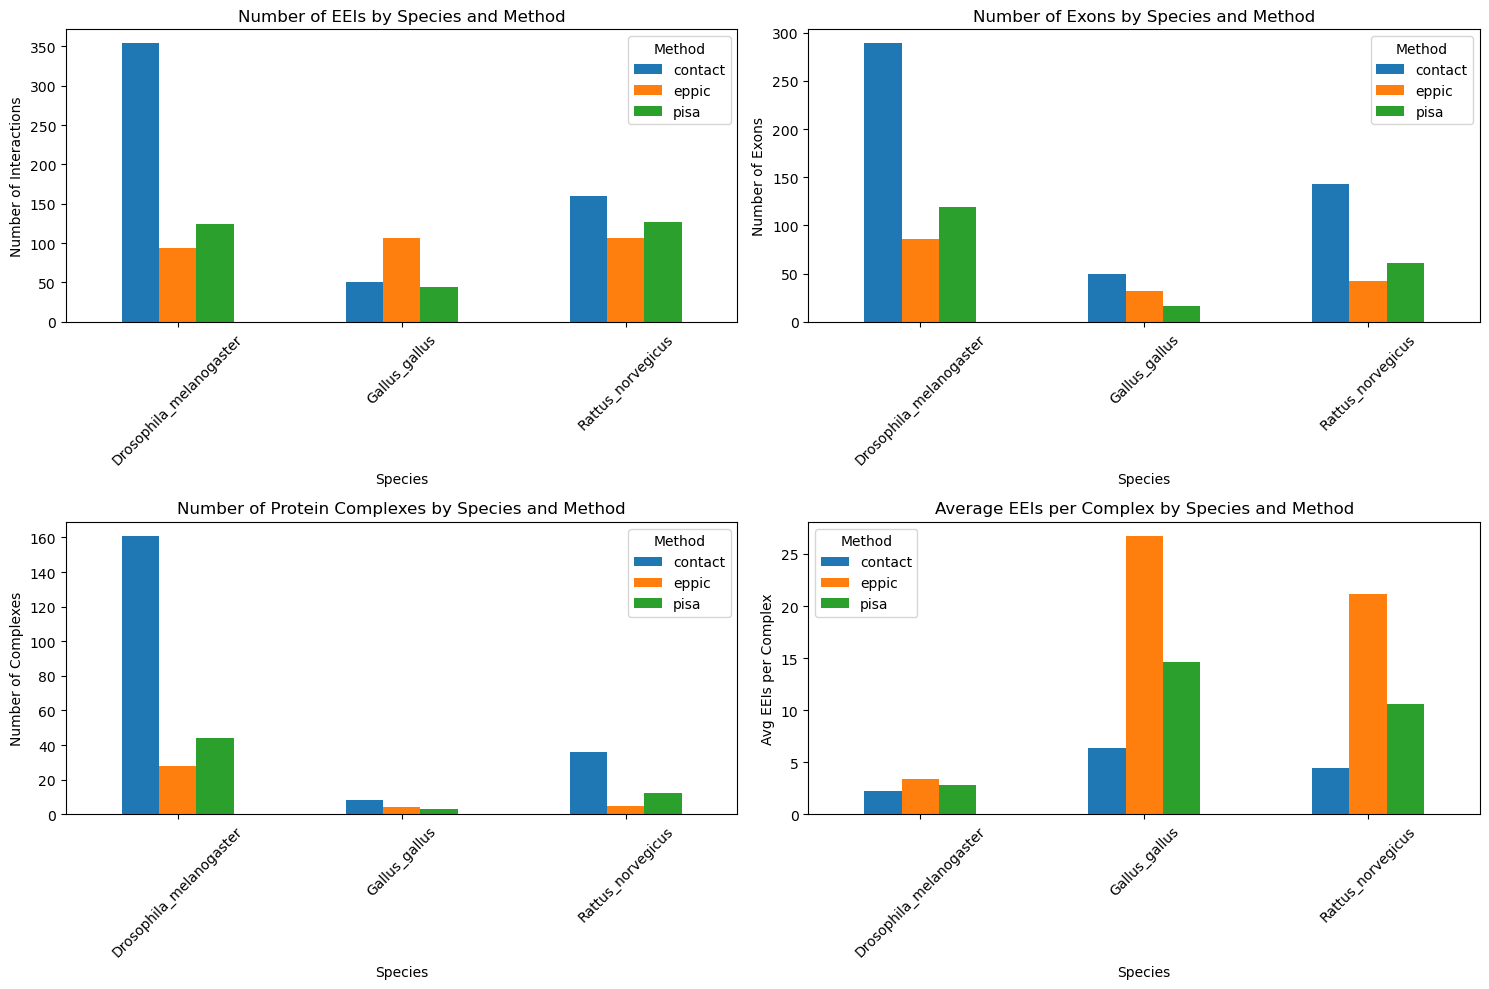

,Species,Method,File,N_Interactions,N_Exons,N_Proteins,N_Complexes,Avg_EEIs_per_Complex,Avg_Degree
0,Gallus_gallus,contact,/cosybio/project/mabouzid/EEI_networks/EEI-Con...,51,49,14,8,6.38,2.08
1,Gallus_gallus,pisa,/cosybio/project/mabouzid/EEI_networks/EEI-Con...,44,16,5,3,14.67,5.50
2,Gallus_gallus,eppic,/cosybio/project/mabouzid/EEI_networks/EEI-Con...,107,32,7,4,26.75,6.69
3,Rattus_norvegicus,contact,/cosybio/project/mabouzid/EEI_networks/EEI-Con...,160,143,57,36,4.44,2.24
4,Rattus_norvegicus,pisa,/cosybio/project/mabouzid/EEI_networks/EEI-Con...,127,61,20,12,10.58,4.16


In [9]:
stats_df = quick_stats()
stats_df.head()

In [10]:

# Method comparison function
def compare_methods(stats_df):
    """
    Compare methods across all species
    """
    print("\nMETHOD COMPARISON (Average across all species)")
    print("=" * 50)
    
    method_comparison = stats_df.groupby('Method').agg({
        'N_Interactions': ['mean', 'std'],
        'N_Exons': ['mean', 'std'],
        'N_Proteins': ['mean', 'std'],
        'N_Complexes': ['mean', 'std'],
        'Avg_EEIs_per_Complex': ['mean', 'std']
    }).round(2)
    
    print(method_comparison)
    
    # Save comparison
    method_comparison.to_csv('method_comparison.csv')

# Species comparison function
def compare_species(stats_df):
    """
    Compare species across all methods
    """
    print("\nSPECIES COMPARISON (Average across all methods)")
    print("=" * 50)
    
    species_comparison = stats_df.groupby('Species').agg({
        'N_Interactions': ['mean', 'std'],
        'N_Exons': ['mean', 'std'],
        'N_Proteins': ['mean', 'std'],
        'N_Complexes': ['mean', 'std'],
        'Avg_EEIs_per_Complex': ['mean', 'std']
    }).round(2)
    
    print(species_comparison)
    
    # Save comparison
    species_comparison.to_csv('species_comparison.csv')


In [11]:
compare_methods(stats_df)
compare_species(stats_df)


METHOD COMPARISON (Average across all species)
        N_Interactions         N_Exons         N_Proteins        N_Complexes  \
                  mean     std    mean     std       mean    std        mean   
Method                                                                         
contact         188.33  153.47  160.33  120.94      82.33  83.92       68.33   
eppic           102.33    7.23   53.33   28.73      22.33  24.01       12.33   
pisa             98.33   47.08   65.33   51.64      33.00  36.29       19.67   

               Avg_EEIs_per_Complex         
           std                 mean    std  
Method                                      
contact  81.46                 4.34   2.09  
eppic    13.58                17.10  12.22  
pisa     21.55                 9.36   6.02  

SPECIES COMPARISON (Average across all methods)
                        N_Interactions         N_Exons         N_Proteins  \
                                  mean     std    mean     std       mean  